<a href="https://colab.research.google.com/github/safakan/CCTB_repo_safak_atakan_celik/blob/main/DEA113/Assignment4/Assignment4_EDA_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [402]:
import pandas as pd
import numpy as np

# to support visualizations with pandas
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date


# This notebook was created with pandas version 2.2.2, and it will not work with version above 3
# Disclaimer about the warnings below, the methods used will be changed.
# SettingWithCopyWarning:
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead

## **Load Data**

In [403]:
url = "https://raw.githubusercontent.com/safakan/CCTB_repo_safak_atakan_celik/refs/heads/main/DEA113/Assignment4/used_cars_data.csv"

data = pd.read_csv(url)

data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## **Check Data**

This step is done parallel with the cleaning and the entire process. It's not possible to use some operations when data is not clean for example. Thus, please review this section as documentations from certain checks, but checks were not limited to these.

In [404]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [405]:
data.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [406]:
# Missing value percentages
(data.isnull().sum()/len(data))*100

,0
S.No.,0.000000
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027575
Engine,0.634220


In [407]:
# Unique value counts
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


In [408]:
data.shape

(7253, 14)

## **Clean Data**

**S.No.**

In [409]:
# 1.1 Dropping "S.No." bcs it's same as ID, not adding value, it would be good to use for cleaning purposes if it was a unique product/car id.
# data.drop(columns=["S.No."], inplace=True)
# maybe not drop.. if index numbers change, this can help us map with the raw data.

**Name**

In [410]:
# Retrieve brand names as a new feature
data["Brand"] = data.Name.str.split().str.get(0)
# Store the rest as model details, the information here can be used further.
data["Variant_Details"] = data.Name.str.split().str[1:].str.join(" ")
# Drop Name column, the new 2 columns add more value now.
data.drop(columns=["Name"], inplace=True)

data[["Brand","Variant_Details"]]

,Brand,Variant_Details
0,Maruti,Wagon R LXI CNG
1,Hyundai,Creta 1.6 CRDi SX Option
2,Honda,Jazz V
3,Maruti,Ertiga VDI
4,Audi,A4 New 2.0 TDI Multitronic
...,...,...
7248,Volkswagen,Vento Diesel Trendline
7249,Volkswagen,Polo GT TSI
7250,Nissan,Micra Diesel XV
7251,Volkswagen,Polo GT TSI


In [411]:
## print(data.Brand.unique())
## print(data.Brand.nunique())
# ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
#  'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
#  'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
#  'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
#  'Lamborghini' 'Hindustan' 'OpelCorsa']


# Land → Land Rover
# OpelCorsa → Opel | Opel is the brand, and Corsa is a model. but this will be dropped due to null price, but still removing it for clearer steps.
# Hindustan → Likely refers to Hindustan Motors, known for the Ambassador car.
# Ambassador → A model from Hindustan Motors.
# ISUZU and Isuzu → Duplicate entry (same brand).


data.loc[data["Brand"] == "Ambassador", "Variant_Details"] = "Ambassador " + data.loc[data["Brand"] == "Ambassador", "Variant_Details"]
data.loc[data["Brand"] == "OpelCorsa", "Variant_Details"] = "Corsa " + data.loc[data["Brand"] == "OpelCorsa", "Variant_Details"]
# 'Isuzu' ,'ISUZU','Mini','Land', 'OpelCorsa', 'Hindustan', 'Ambassador',
# searchfor = ['OpelCorsa', 'Hindustan', 'Ambassador']
# data[data.Brand.str.contains('|'.join(searchfor))]

data["Brand"] = data["Brand"].replace({"ISUZU": "Isuzu", "Land":"Land Rover", "Ambassador": "Hindustan Motors", "Hindustan": "Hindustan Motors", "OpelCorsa": "Opel"})

data["Brand"] = data["Brand"].astype("category")

**Location, Year, Fuel_Type, Transmission**

In [412]:
## There were no missing values, but just checked the values itself, maybe there're errors, irrelevant information, typos.
# data.Location.unique()
# # array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
# #        'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
# #       dtype=object)
data["Location"] = data["Location"].astype("category")

In [413]:
# data.Year.unique()
# # array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
# #        2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998,
# #        1996])

In [414]:
# data.Fuel_Type.unique()
# # array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)
data["Fuel_Type"] = data["Fuel_Type"].astype("category")
# drop where it's electric because there're only 2 data points
data = data[data["Fuel_Type"] != "Electric"]

In [415]:
# data.Transmission.unique()
# # array(['Manual', 'Automatic'], dtype=object)
data["Transmission"] = data["Transmission"].astype("category")

<ipython-input-415-9f773b7255ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Transmission"] = data["Transmission"].astype("category")


**KilometersDriven**

In [416]:
# len(data.Kilometers_Driven.unique())
# print(data.Kilometers_Driven.max())  ## 6.5 million kms, seems suspicious.
# print(data.Kilometers_Driven.min())
# data.Kilometers_Driven.describe()

# sort desceding

data.sort_values(by="Kilometers_Driven", ascending=False)
## I will be checking this further against Owner_Types and Car Ages for example. There's at least one record that needs removing

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Variant_Details
2328,2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,NaN,65.00,BMW,X5 xDrive 30d M Sport
340,340,Kolkata,2013,775000,Diesel,Automatic,First,19.3 kmpl,1968 CC,141 bhp,5.0,NaN,7.50,Skoda,Octavia Ambition Plus 2.0 TDI AT
1860,1860,Chennai,2013,720000,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.90,Volkswagen,Vento Diesel Highline
358,358,Chennai,2009,620000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.70,Hyundai,i10 Magna 1.2
3092,3092,Kolkata,2015,480000,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,5.00,Honda,City i VTEC SV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5941,5941,Pune,2018,1000,Petrol,Manual,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.45 Lakh,3.40,Renault,KWID RXL
6201,6201,Kolkata,2019,1000,Petrol,Manual,First,24.7 kmpl,796 CC,47.3 bhp,5.0,3.99 Lakh,NaN,Maruti,Alto LXI
1161,1161,Ahmedabad,2018,1000,Petrol,Automatic,First,20.3 kmpl,1199 CC,84 bhp,5.0,NaN,6.85,Tata,Tigor 1.2 Revotron XTA
5606,5606,Mumbai,2019,600,Petrol,Automatic,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,6.8 Lakh,6.25,Maruti,Wagon R ZXI AMT 1.2


**Owner_Type**

In [417]:
# data.Owner_Type.unique()
data["Owner_Type_Categorical"] = pd.Categorical(data["Owner_Type"],
                categories=["First", "Second", "Third", "Fourth & Above"],
                ordered=True)

# Also having a separate column converting values to numerical, because the numbers and their order are also meaningful.
data["Owner_Type_Numeric"] = data["Owner_Type"].map({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4})

data.drop(columns=["Owner_Type"], inplace=True)

<ipython-input-417-730bfb04cde3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Owner_Type_Categorical"] = pd.Categorical(data["Owner_Type"],
<ipython-input-417-730bfb04cde3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Owner_Type_Numeric"] = data["Owner_Type"].map({"First": 1, "Second": 2, "Third": 3, "Fourth & Above": 4})
<ipython-input-417-730bfb04cde3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

**Mileage**

In [418]:
# # ## Making sure to not remove something without noticing it.
# field_mileage = data[data["Mileage"].notnull()]["Mileage"].str.split(' ').tolist()
# mp = {}
# mp["measures"] = []
# for i in field_mileage:
#   mp[len(i)] = None # print(len(mp)) # 2
#   mp["measures"].append(i[1]) # print(set(mp["measures"]))  # {'km/kg', 'kmpl'}


# CONVERTING INTO A COMMON UNIT OF MEASURE AND NUMERICAL FIELD
# km/kg is for gas fuels (CNG, LPG) | kmpl is for liquid fuels (Petrol, Diesel)
# double checking for erroneous data
# data[data["Fuel_Type"].isin(["Petrol", "Diesel"])]["Mileage_Unit"].unique() # only kmpl
# data[data["Fuel_Type"].isin(["LPG", "CNG"])]["Mileage_Unit"].unique() only km/kg


# Formula for conversion: Mass = Density x Volume
# https://www.sciencedirect.com/topics/engineering/diesel-fuel#:~:text=The%20density%20of%20petroleum%20diesel,0.70%E2%80%930.75%20kg%2Fl.
# https://www.quora.com/What-is-the-weight-of-1-litre-petrol
densities = {
    "Petrol": 0.75,
    "Diesel": 0.85
}

data[["Mileage", "Mileage_Unit"]] = data[data["Mileage"].notnull()]["Mileage"].str.split(' ', expand=True)
data["Mileage"] = pd.to_numeric(data["Mileage"])

data["Mileage"] = data.apply(lambda row:
                             row["Mileage"] / densities["Petrol"] if row["Fuel_Type"] == "Petrol" else
                             row["Mileage"] / densities["Diesel"] if row["Fuel_Type"] == "Diesel" else
                             row["Mileage"], axis=1)

# No need to explicitly mention
data.drop(columns=["Mileage_Unit"], inplace=True)

# # Mileage can not be 0, it is the energy consumption
data = data[data["Mileage"] != 0]

**Engine**

In [419]:
# ## Making sure to not remove something without noticing it.
# field_engine = data[data["Engine"].notnull()]["Engine"].str.split(' ').tolist()
# mp = {}
# mp["measures"] = []
# for i in field_engine:
#   mp[len(i)] = None # print(len(mp)) # 2
#   mp["measures"].append(i[1]) # print(set(mp["measures"]))  # {'CC'}
# # all CC, good.

## SEPARATE MEASURES FROM VALUES
data["Engine"] = data["Engine"].str.split(" ").str[0]
data.rename(columns={"Engine": "Engine_CC"}, inplace=True) # to keep the unit of measure

# CASTING TO NUMERIC
data["Engine_CC"] = pd.to_numeric(data["Engine_CC"])


## FILL MISSING VALUES
# data["Engine_CC"].plot(kind="line")
# print("Mean is: ", data["Engine_CC"].mean())
# print("Median is: ", data["Engine_CC"].median())
# print("Mode is: ", data["Engine_CC"].mode()[0])
# data["Engine_CC"].plot(kind="box")
data["Engine_CC"] = data["Engine_CC"].fillna(data["Engine_CC"].median())

**Power**

In [420]:
## Making sure to not remove something without noticing it.
# field_power = data[data["Power"].notnull()]["Power"].str.split(' ').tolist()
# mp = {}
# mp["measures"] = []
# for i in field_power:
#   mp[len(i)] = None # print(len(mp)) # 2
#   mp["measures"].append(i[1]) # print(set(mp["measures"]))  # {'bhp'}
## all bhp, good.


## Split the measures from values
data["Power"] = data["Power"].str.split(' ').str[0]
data.rename(columns={"Power": "Power_bph"}, inplace=True) # to keep a record of the unit used


## CASTING TO NUMERIC
#  pd.to_numeric(data["Power_bph"]) # ValueError: Unable to parse string "null"
# data[data["Power_bph"] == "null"] # 129 records.
data["Power_bph"] = data["Power_bph"].replace("null", pd.NA) # replacing string representations with actual null
# data[data["Power"] == "null"] # 0 records now.
data["Power_bph"] = pd.to_numeric(data["Power_bph"])


## FILL MISSING VALUES
# data["Power_bph"].plot(kind="line")
# print("Mean is: ", data["Power_bph"].mean())
# print("Median is: ", data["Power_bph"].median())
# print("Mode is: ", data["Power_bph"].mode()[0])
# data["Power_bph"].plot.box()

# There are many outliers, mod seems like the best option to fill.
data["Power_bph"] = data["Power_bph"].fillna(data["Power_bph"].mode()[0])

**Seats**

In [421]:
# data["Seats"].unique() # [ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9., 0]
# data["Seats"] = data["Seats"].astype(int)

# data[data["Seats"] == 0]
# There is one record with 0 seats, it's not possible. I found out online that it's 5, but the record itself lost it's integrity, I will remove the record.
data = data[data["Seats"] != 0]

# Mod(5) is a good value here to fill
data["Seats"] = data["Seats"].fillna(data["Seats"].mode()[0])

# data["Seats"].plot(kind="line")
# data.sort_values(by="Seats", ascending=False)


# Still some of the values are wrong. The decision for now is to drop this column.
data.drop(columns=["Seats"], inplace=True)

<ipython-input-421-878e368a280b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Seats"] = data["Seats"].fillna(data["Seats"].mode()[0])
<ipython-input-421-878e368a280b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Seats"], inplace=True)


**New_Price**

<ipython-input-422-e460fb4f9423>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["Price_New", "Currency"]] = data[data["New_Price"].notnull()]["New_Price"].str.split(' ', expand=True)
<ipython-input-422-e460fb4f9423>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[["Price_New", "Currency"]] = data[data["New_Price"].notnull()]["New_Price"].str.split(' ', expand=True)
<ipython-input-422-e460fb4f9423>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame


,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Mileage,Engine_CC,Power_bph,Price,Brand,Variant_Details,Owner_Type_Categorical,Owner_Type_Numeric,Price_New,Currency,PriceDiff
5769,5769,Coimbatore,2019,20712,Petrol,Manual,31.786667,1199.0,84.00,6.94,Tata,Tiago 1.2 Revotron XZ,First,1,6.59,Lakh,-0.35
5560,5560,Kochi,2019,6568,Petrol,Manual,33.560000,799.0,53.30,5.09,Renault,KWID RXT Optional,First,1,4.78,Lakh,-0.31
5102,5102,Kochi,2019,31817,Petrol,Manual,30.000000,998.0,67.04,5.34,Maruti,Wagon R VXI,First,1,5.12,Lakh,-0.22
1324,1324,Coimbatore,2019,16862,Petrol,Manual,27.853333,1197.0,81.80,6.06,Maruti,Ignis 1.2 Delta,First,1,6.07,Lakh,0.01
2851,2851,Kochi,2018,18335,Petrol,Manual,28.933333,999.0,67.00,4.50,Renault,KWID 1.0 RXT Optional,First,1,4.61,Lakh,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,148,Mumbai,2013,23000,Petrol,Automatic,14.733333,2894.0,444.00,37.00,Audi,RS5 Coupe,First,1,128.00,Cr,91.00
2056,2056,Kochi,2015,29966,Diesel,Automatic,19.729412,2993.0,261.49,43.60,BMW,7 Series 730Ld Eminence,Second,2,140.00,Cr,96.40
3132,3132,Kochi,2019,14298,Petrol,Automatic,17.773333,2995.0,340.00,2.02,Porsche,Cayenne Base,First,1,136.00,Cr,133.98
3199,3199,Kolkata,2012,41100,Diesel,Automatic,19.729412,2993.0,261.49,26.50,BMW,7 Series 730Ld Design Pure Excellence CBU,First,1,166.00,Cr,139.50


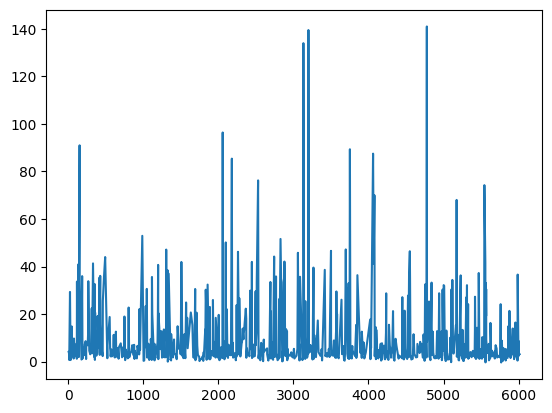

In [422]:
# # Making sure to not remove something without noticing it, and not to assume currencies.
# new_price_list = data[data["New_Price"].notnull()]["New_Price"].str.split(' ').tolist()
# mp = {}
# mp["currencies"] = []
# for i in new_price_list:
#   mp[len(i)] = None # print(len(mp)) # 2
#   mp["currencies"].append(i[1]) # print(set(mp["currencies"])) # {'Cr', 'Lakh'}


# data_filtered = data[data["New_Price"].notnull()]
# result1 = data_filtered[data_filtered["New_Price"].str.endswith("h")]
# result2 = data_filtered[data_filtered["New_Price"].str.endswith("r")]


# Filter where new price is not null and move the currencies here to a separate field.
data[["Price_New", "Currency"]] = data[data["New_Price"].notnull()]["New_Price"].str.split(' ', expand=True)
# Drop the old New_Price column
data.drop(columns=["New_Price"], inplace=True)

# type casts to allow operations
data["Price_New"] = pd.to_numeric(data["Price_New"])
data["Price"] = pd.to_numeric(data["Price"])

# Update Price_New values where the currency is Crore and use Lakh as the common currency.
data["Price_New"] = data.apply(lambda row: row["Price_New"] * 100 if row["Currency"] == "Cr" else row["Price_New"], axis=1)

#
data["PriceDiff"] = data["Price_New"] - data["Price"]

data[data["PriceDiff"].notnull()]["PriceDiff"].plot(kind="line")
data[data["PriceDiff"].notnull()].sort_values(by="PriceDiff", ascending=True)
## 3 values are negative, this means someone is selling their car above their new_price
## this shouldn't be possible. dataset looks problematic.

In [423]:
# Dropping the Price_New, PriceDiff, Currency columns. They were useful during the process, but they would hurt the analysis.
data.drop(columns=["Price_New", "PriceDiff", "Currency"], inplace=True)
# 86 percent of the new prices are missing. It's too much to fill.
# PriceDiff values show problematic records and it's dependent on new prices. Not reliable.
# Currencies field is also dependent on the new price field's integrity. It's not adding much value going forwards.

**Price**

In [424]:
# Price field was not indicating any currencies, but based on comparisons with the new prices and internet lookups
# the most reasonable assumption seems like Lakh.
# As long as the they're consistent within themselves the numerical values would be meaningful.
# data.rename(columns={"Price": "Price_Lakh"}, inplace=True) # just for documentation purposes.


# FILLING MISSING VALUES
# data["Price_Lakh"].plot(kind="line")
# data["Price_Lakh"].plot(kind="box")

# print(f"""
# mean: {data["Price_Lakh"].mean()}
# median: {data["Price_Lakh"].median()}
# mod: {data["Price_Lakh"].mode()[0]}
# """)
## mean: 9.455169804976464
## median: 5.65
## mod: 4.5


# The decision here is to drop records instead of filling.
## Price is a quite influential field in a used car dataset.
## 17 percent missing data is not small, and if we fill that with even mod it can harm the results.
### this data can be further cleaned and investigated, if we fill now it might show extremely unusual prices.
### additionally, this is a field that is always has a flexibility/independence from other fields due to people posting whatever price they want. It's not completely independent, but it is a risky field to make assumptions.

data = data.dropna(subset=['Price'])

---

**New Feature: Car Age**

In [425]:
data['Car_Age']=date.today().year-data['Year']

<ipython-input-425-3ab6b27b7c33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Car_Age']=date.today().year-data['Year']


---

**Check Data**

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   S.No.                   5948 non-null   int64   
 1   Location                5948 non-null   category
 2   Year                    5948 non-null   int64   
 3   Kilometers_Driven       5948 non-null   int64   
 4   Fuel_Type               5948 non-null   category
 5   Transmission            5948 non-null   category
 6   Mileage                 5948 non-null   float64 
 7   Engine_CC               5948 non-null   float64 
 8   Power_bph               5948 non-null   float64 
 9   Price                   5948 non-null   float64 
 10  Brand                   5948 non-null   category
 11  Variant_Details         5948 non-null   object  
 12  Owner_Type_Categorical  5948 non-null   category
 13  Owner_Type_Numeric      5948 non-null   int64   
 14  Car_Age                 5948 

In [427]:
data.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine_CC,Power_bph,Price,Owner_Type_Numeric,Car_Age
count,5948.000000,5948.000000,5.948000e+03,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000,5948.000000
mean,3011.873067,2013.406523,5.856751e+04,22.793595,1619.386685,112.459632,9.455170,1.200067,11.593477
std,1736.054569,3.220996,9.167487e+04,5.034408,597.079634,53.583694,11.140086,0.452544,3.220996
min,0.000000,1998.000000,1.710000e+02,8.533333,624.000000,34.200000,0.440000,1.000000,6.000000
25%,1512.750000,2012.000000,3.390075e+04,19.200000,1198.000000,74.000000,3.500000,1.000000,9.000000
50%,3011.500000,2014.000000,5.300000e+04,23.141176,1493.000000,91.860000,5.650000,1.000000,11.000000
75%,4514.250000,2016.000000,7.299700e+04,26.413333,1968.000000,138.030000,9.900000,1.000000,13.000000
max,6018.000000,2019.000000,6.500000e+06,34.666667,5998.000000,560.000000,160.000000,4.000000,27.000000


In [428]:
data.shape

(5948, 15)

In [429]:
# Missing value percentages
(data.isnull().sum()/len(data))*100

,0
S.No.,0.0
Location,0.0
Year,0.0
Kilometers_Driven,0.0
Fuel_Type,0.0
Transmission,0.0
Mileage,0.0
Engine_CC,0.0
Power_bph,0.0
Price,0.0


In [430]:
# Unique value counts
data.nunique()

,0
S.No.,5948
Location,11
Year,22
Kilometers_Driven,3066
Fuel_Type,4
Transmission,2
Mileage,520
Engine_CC,142
Power_bph,365
Price,1363


**Outlier Removal**

In [431]:
## This attempt is postponed due to meet the deadlines. The data will have some outliers.
# I will try to interpret carefully and work on the side to remove outliers from the dataset, and will think about moving this step before filling missing values.


# data["Kilometers_Driven"].sort_values(ascending=False)
# Q1 = data["Kilometers_Driven"].quantile(0.25)
# Q3 = data["Kilometers_Driven"].quantile(0.75)
# IQR = Q3 - Q1
# filtered = (data["Kilometers_Driven"] >= Q1 - 1.5 * IQR) & (data["Kilometers_Driven"] <= Q3 + 1.5 *IQR)
# # filtered.value_counts()


# Just removing one extreme outlier that would most likely skew the results significantly
data = data.sort_values(by="Kilometers_Driven", ascending=False).iloc[1:]

**VISUALS AND INSIGHTS**

**Box Plots for Distribution View & Outlier Visibility**

<Axes: >

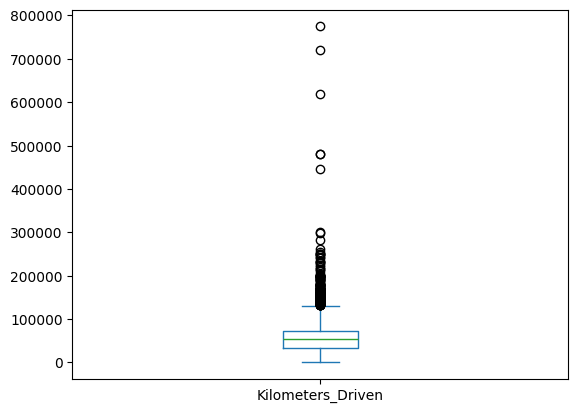

In [433]:
data["Kilometers_Driven"].plot(kind="box")
# data["Kilometers_Driven"].plot(kind="box", showfliers=False) # this can be used to hide outliers, but they would still be in the data.

<Axes: >

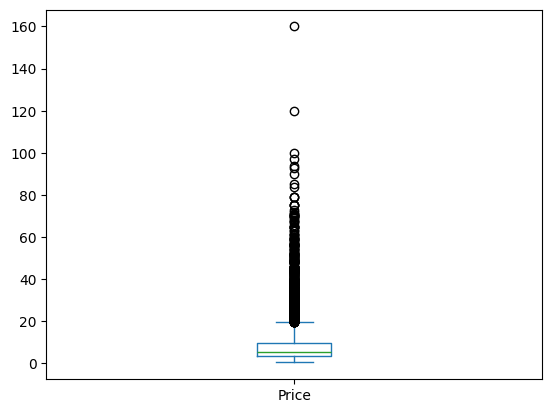

In [434]:
data["Price"].plot(kind="box")

<Axes: >

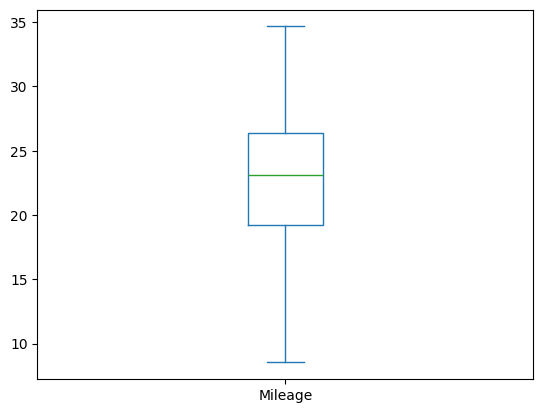

In [435]:
data["Mileage"].plot(kind="box") # no outliers it seems

<Axes: >

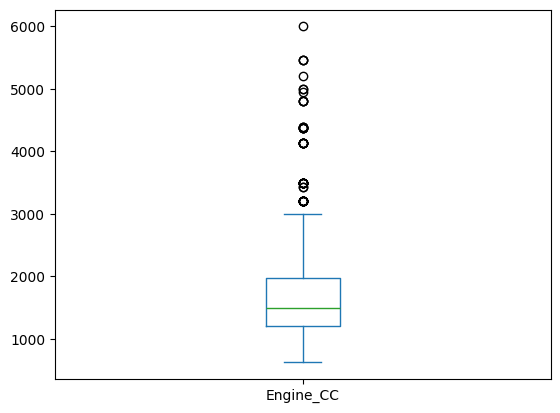

In [436]:
data["Engine_CC"].plot(kind="box")

<Axes: >

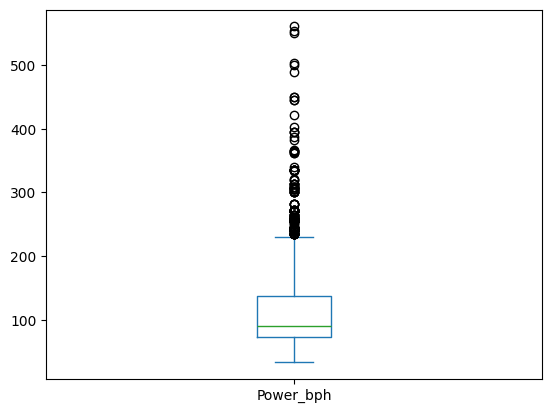

In [437]:
data["Power_bph"].plot(kind="box")

<Axes: >

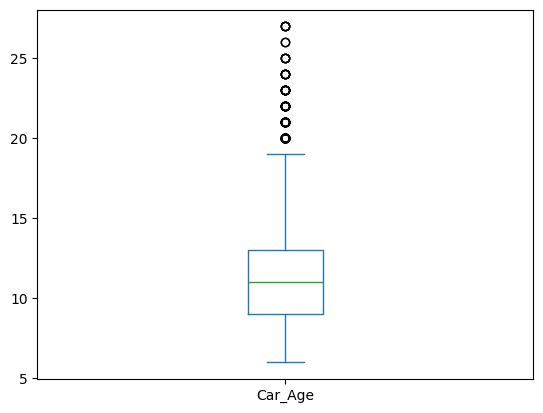

In [438]:
data["Car_Age"].plot(kind="box")

<Axes: xlabel='Brand'>

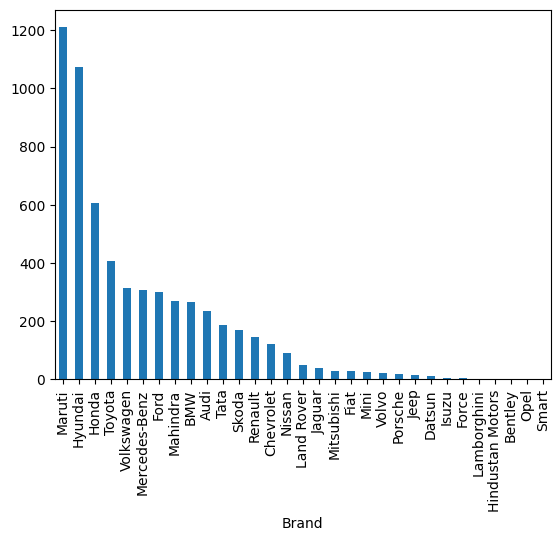

In [452]:
data["Brand"].value_counts().plot(kind="bar") # IMPORTANT TAKEAWAY: due to assignments/slicing with copies removed brands still appear.
# Majority of the cars are from the brands Maruti, Hyundai, Honda and Toyota it seems. It can be investigated further to see why. What makes people prefer these and why do these exist more in the marketplace?

<Axes: xlabel='Location'>

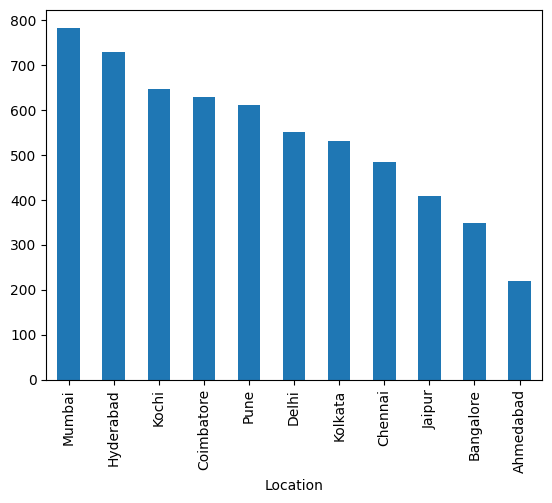

In [458]:
data["Location"].value_counts().plot(kind="bar")
# Mumbai has the most of the listings while Ahmedabad has the least, however, the distribution decreases gradually and it's not extreme.

<Axes: xlabel='Mileage', ylabel='Price'>

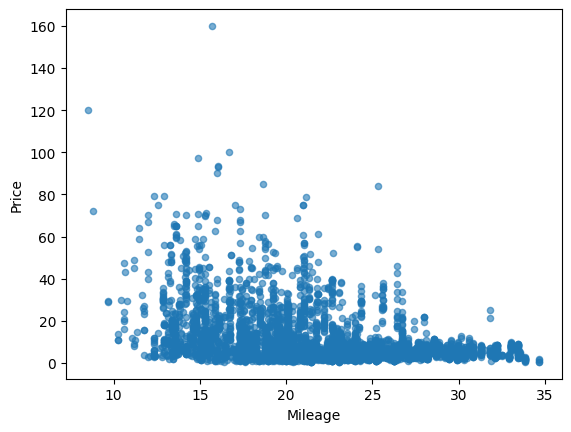

In [456]:
data.plot(kind="scatter", x="Mileage", y="Price", alpha=0.6)
# There's a clear negative correlation,
# Cars with lower energy consumption rates have higher prices

<Axes: xlabel='Transmission'>

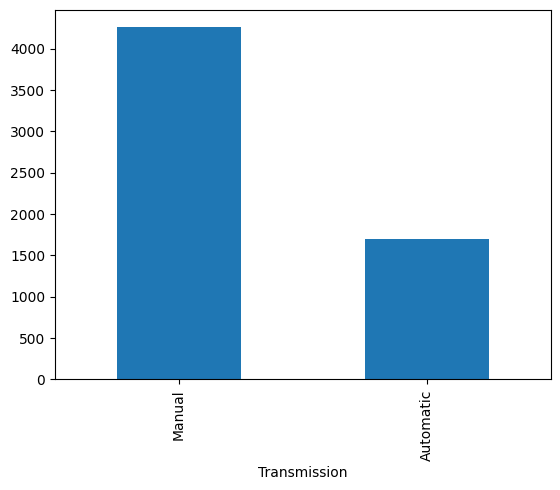

In [459]:
data["Transmission"].value_counts().plot(kind="bar")
# The amount of cars with manual transmissions is more than double that of cars with automatic transmissions

<Axes: xlabel='Fuel_Type'>

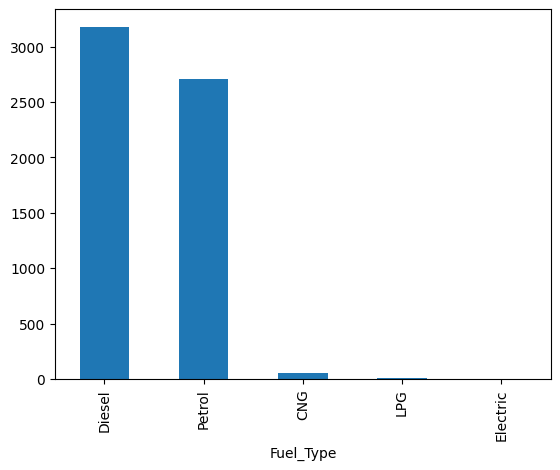

In [460]:
data["Fuel_Type"].value_counts().plot(kind="bar")
# the dataset mostly contains cars using diesel or petrol. The amount of the rest is not significant.

<Axes: xlabel='Owner_Type_Categorical'>

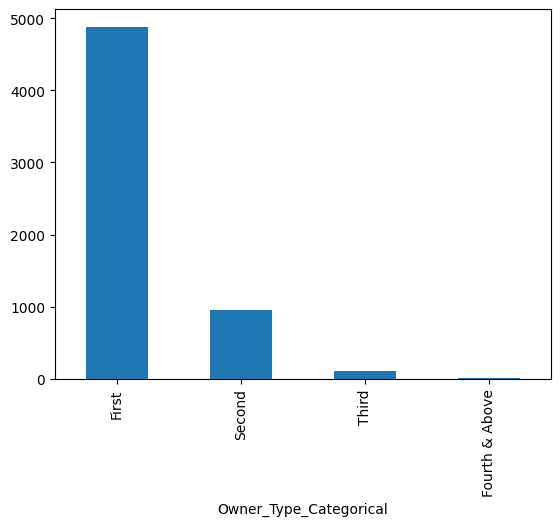

In [472]:
data["Owner_Type_Categorical"].value_counts().plot(kind="bar")
# Most of the cars are sold by their first owners

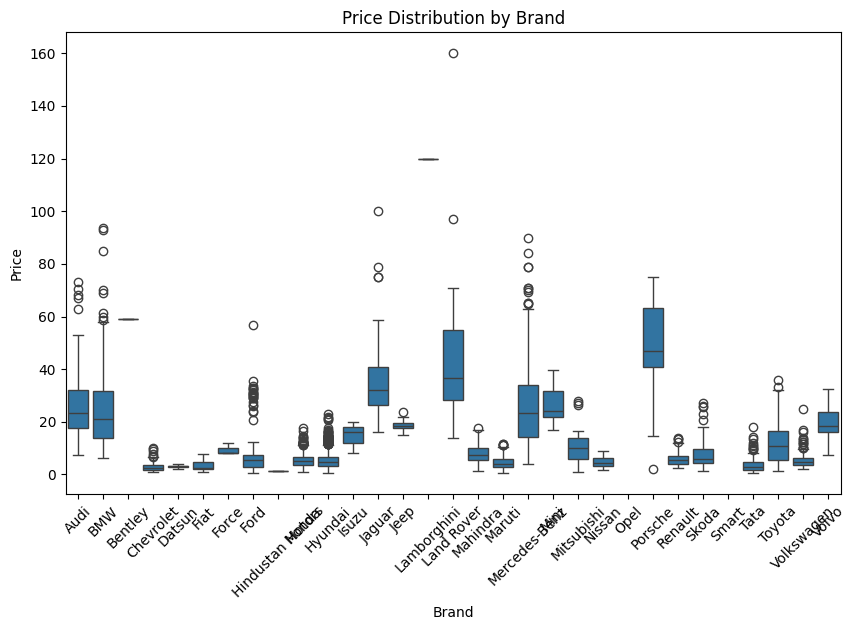

In [474]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Brand", y="Price", data=data)
plt.title("Price Distribution by Brand")
plt.xticks(rotation=45) # rotating names to be able to read brand names
plt.show()

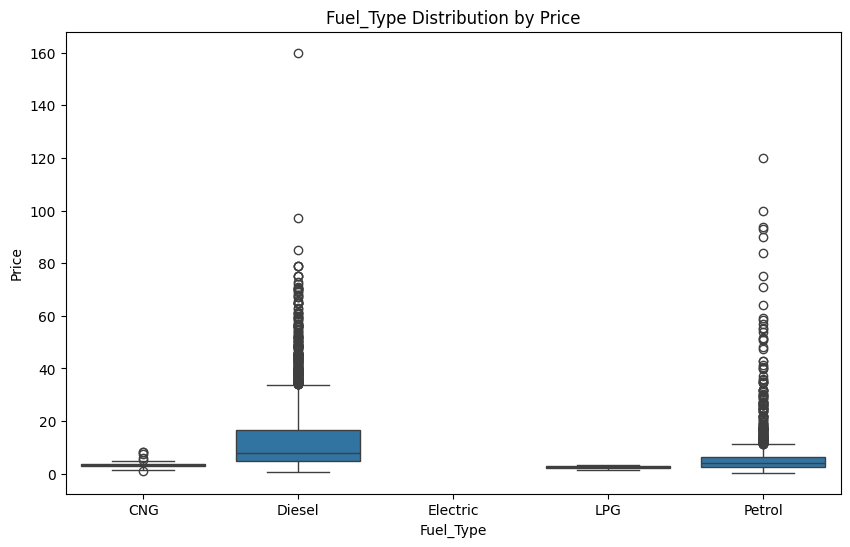

In [478]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Fuel_Type", y="Price", data=data)
plt.title("Fuel_Type Distribution by Price")
# plt.xticks(rotation=45)
plt.show()

# On average diesel cars seem to have higher mean for price. This is probably linked to the mileage values. Cars with lower energy consumptions are high in demand (observation not a statistical insight from this dataset) and this could be the reason.

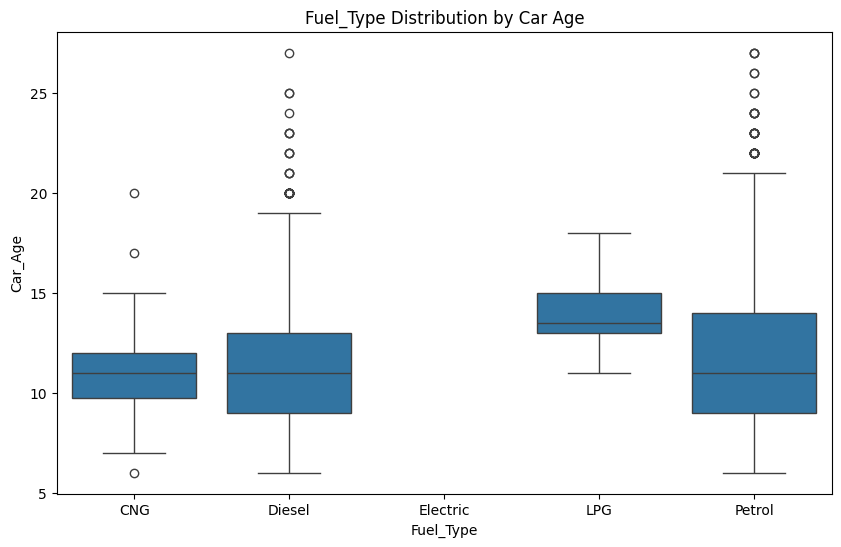

In [480]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Fuel_Type", y="Car_Age", data=data)
plt.title("Fuel_Type Distribution by Car Age")
# plt.xticks(rotation=45)
plt.show()

# petrol and diesel cars have the smallest car ages
# CNG, petrol and diesel cars share similar medians, and share a similar central area of distribution even though the width of the distribution increases from CNG>Diesel>Petrol
# LPG cars have the highest median..
## However, we should keep in mind that sample for CNG and LPG cars is small, thus it is dangerous to make assumptions, and safer to use a tentative approach.

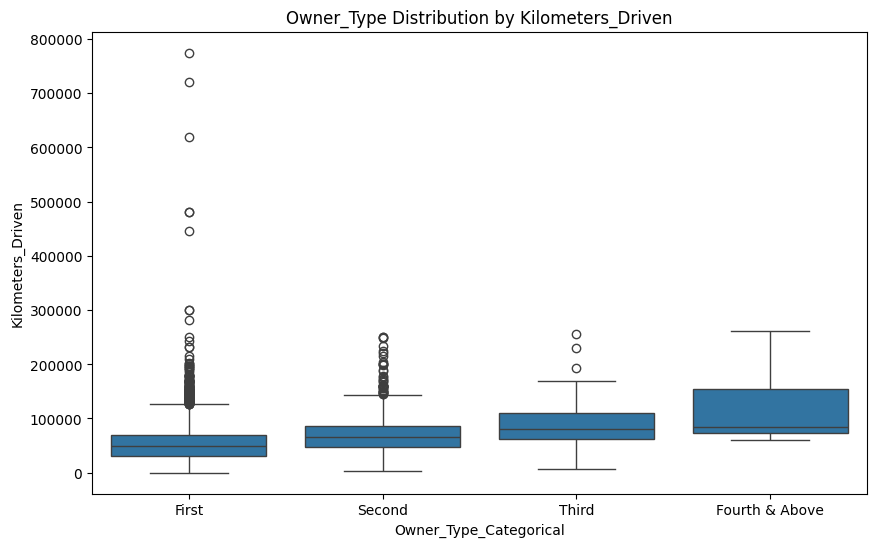

In [482]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Owner_Type_Categorical", y="Kilometers_Driven", data=data)
plt.title("Owner_Type Distribution by Kilometers_Driven")
# plt.xticks(rotation=45)
plt.show()

# data["Owner_Type_Categorical"].value_counts()
# counts
# Owner_Type_Categorical
# First	4882
# Second	948
# Third	109
# Fourth & Above	8

# Keeping these counts above, the results from owner_type "Fourth and Above" should be ignored.
## However, still the intuitively expected positive correlation between owner type and kilometers_driven is apparent here.

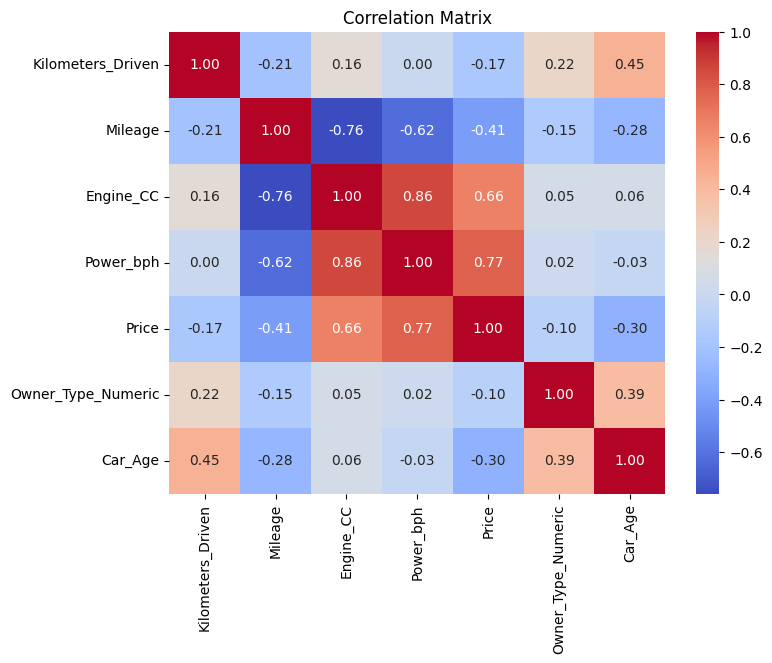

In [488]:
numerical_data = data[["Kilometers_Driven", "Mileage", "Engine_CC", "Power_bph", "Price", "Owner_Type_Numeric", "Car_Age"]] #removed year because it shows contradicting results, instead using Car Age.

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Correlations**

Correlations under positive & negative sub categories are ordered based on their correlation levels in descending order. Additionally, a correlation pair mentioned earlier in the list is not mentioned later on under other fields sub bullets.

- Car Age
 - positives
   - kilometers_driven:
   - owner_type:
   - engine_cc: not significant
 - negatives
   - price: car prices drop as their age go up
   - mileage: older cars tend to have higher energy consumption rates --tecnological improvements
   - power_bph: not significant, but seems accurate considering the developments in technology   

- Owner Type
 - positives
   - kilometers_driven:
   - engine_cc: not significant, but even if not, these two are logically too unrelated.
   - power_bph: not significant, but even if not, these two are logically too unrelated.
 - negatives
   - mileage: older cars might have more previous owners, and older cars tend to have higher mileage rates thanks to the development in technology.
   - price: the direction is expected, but the level of it is small.

- Price
 - positives
   - Power_bph: significant, this could be linked to people prefering cars with higher speeds, torque and power potentially.
   - Engine_CC: significant, this could be linked to people prefering cars with higher speeds, torque and power potentially.
 - negatives
   - Mileage: quite significant, people seem to be willing to pay more for a car that consumes less energy.
   - Kilometers_driven:

- Power_bph
 - positives
   - Engine_CC: this is the highest correlation within the dataset, and it is supported by the definition of these. Both of these are in the engine, although they have different roles, they support the car's performance and they are aimed to make cars more performant
 - negatives
   - Mileage: Powerful cars consume less energy it seems.
 - no linear relationship:
   - kilometers_driven: this relation supports this: "A car's travel distance is unrelated to its performance at any single point in time."

- Engine_CC
 - positives
   - kilometers_driven: this is not too significant, but I would suggest being cautious, as the relation might be non linear between these two as in the kilometers_driven-power_bph pair.
 - negatives
   - mileage: Cars with higher CCs consume less energy it seems. These relationships (engine_CC:mileage, Power_bph:mileage) are interesting, because within common sense it is considered more power consumes more energy. However, this is probably linked to the technological advancements and we probably found ways to make things more efficient without decreasing performance. Old cars and new cars can be investigated further to understand these relations further.

- Mileage
 - negatives
   - kilometers_driven: altough there seems to be a correlation, I would suggest being cautious, as the relation might be non linear between these two as in the kilometers_driven-power_bph pair has based on this dataset.
    

---
# Disclaimer
- We need to be cautious when taking on insights from here. The work here can be extended further. The attempts made it clearer, but not entirely. There're outliers still, there were different units used under same fields, it's not consistent. It was hard to trust the integrity; overall it supports the expected intuitions, but that's not our goal. This EDA should give an idea about the dataset, however, to make it better, cleaning can be a lot more extensive, and potentially data mining can be used to retrieve additional information.